In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [ ]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [ ]:
df=df.drop(['day','month','year'],axis=1)

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df=df.drop('FWI',axis=1)

In [ ]:
Y = df['Classes']
X = df.drop('Classes',axis=1)

In [ ]:
X.shape,Y.shape

((243, 10), (243,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


<Figure size 2500x100 with 0 Axes>

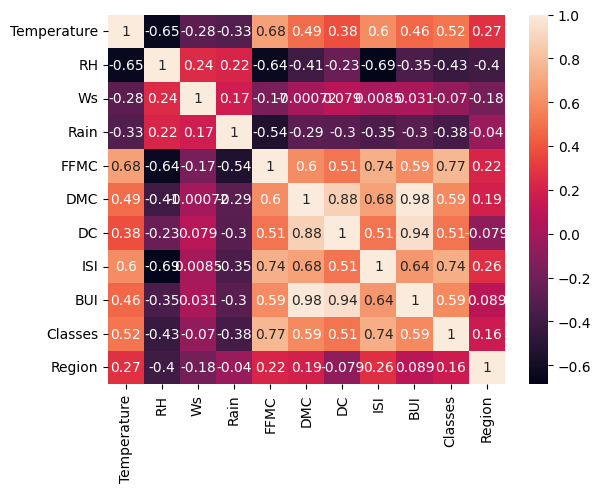

<Figure size 2500x100 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(25,1))

In [ ]:
#Now we need to drop columns with high Collinearity that is multi collinearity
def correlation(df,att):
     set_coor=set()
     corr=df.corr()
     for i in range(len(corr.columns)):
         for j in range(i):
             if abs(corr.iloc[i,j])>att :
                 set_coor.add(corr.columns[i])
     return set_coor
                 

In [ ]:
res=correlation(X_train,0.85)
res

{'BUI', 'DC'}

In [ ]:
X_train.drop(res,axis=1,inplace=True)
X_test.drop(res,axis=1,inplace=True)
X_train.shape

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_standard=scaler.fit_transform(X_train)
X_test_standard=scaler.fit_transform(X_test)


<Axes: title={'center': 'After standardization'}>

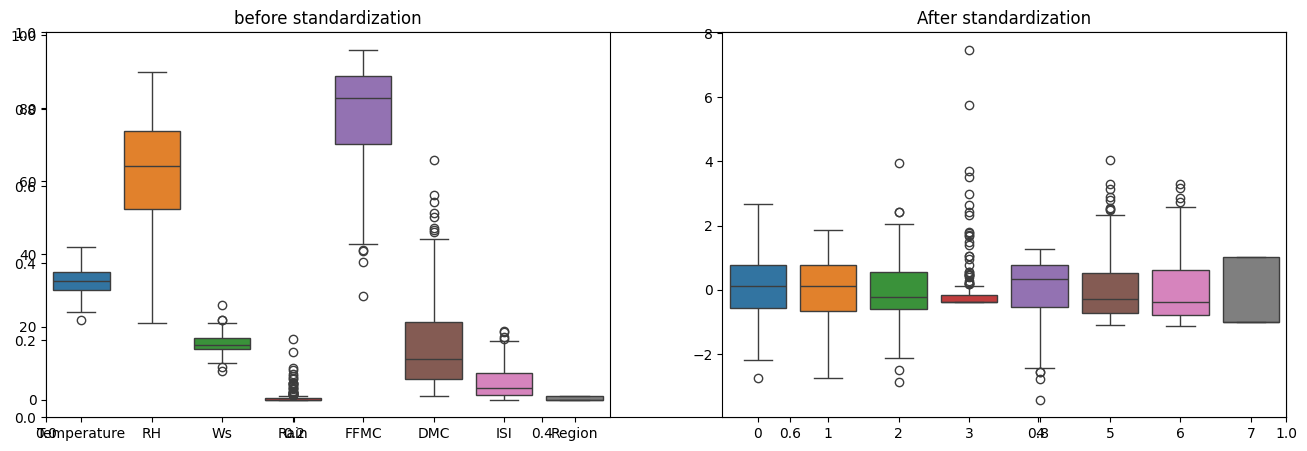

In [ ]:
plt.subplots(figsize=(16,5))

plt.subplot(1,2,1)
plt.title('before standardization')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('After standardization')
sns.boxplot(data=X_train_standard)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1) # how many processors are there in the system it will try to run that 
regression.fit(X_train,Y_train) # if independent feature is not two dimensional here we get  error
print("Intercept:",regression.intercept_)
print("Coefficient:",regression.coef_)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred=regression.predict(X_test)
print("mse:",mean_squared_error(Y_test,Y_pred))
print("mae:",mean_absolute_error(Y_test,Y_pred))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:",rmse)          
r2=r2_score(Y_test,Y_pred)
print("r2_score",r2)
adj_r2=1- (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("adj_r2",adj_r2)

Intercept: -1.910048692931244
Coefficient: [-0.00238325  0.01044573 -0.00972138  0.02236527  0.02208759  0.00172778
  0.05828679 -0.00510467]
mse: 0.08394969056698262
mae: 0.2463845444146629
rmse: 0.28974072990689903
r2_score 0.6482243259011912
adj_r2 0.5941049914244514


In [ ]:
#Lasso
from sklearn.linear_model import Lasso
regression=Lasso() # how many processors are there in the system it will try to run that 
regression.fit(X_train,Y_train) # if independent feature is not two dimensional here we get  error
print("Intercept:",regression.intercept_)
print("Coefficient:",regression.coef_)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred=regression.predict(X_test)
print("mse:",mean_squared_error(Y_test,Y_pred))
print("mae:",mean_absolute_error(Y_test,Y_pred))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:",rmse)          
r2=r2_score(Y_test,Y_pred)
print("r2_score",r2)
adj_r2=1- (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("adj_r2",adj_r2)

Intercept: -1.0726441614293607
Coefficient: [ 0.         -0.          0.         -0.          0.02016245  0.00385529
  0.          0.        ]
mse: 0.11174173033026008
mae: 0.3028455941398902
rmse: 0.33427792378537363
r2_score 0.5317669160372773
adj_r2 0.4597310569660892


In [ ]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge() # how many processors are there in the system it will try to run that 
ridge.fit(X_train,Y_train) # if independent feature is not two dimensional here we get  error
print("Intercept:",ridge.intercept_)
print("Coefficient:",ridge.coef_)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred=ridge.predict(X_test)
print("mse:",mean_squared_error(Y_test,Y_pred))
print("mae:",mean_absolute_error(Y_test,Y_pred))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:",rmse)          
r2=r2_score(Y_test,Y_pred)
print("r2_score",r2)
adj_r2=1- (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("adj_r2",adj_r2)

Intercept: -1.9102843793782702
Coefficient: [-0.00236768  0.01043711 -0.00968256  0.02230785  0.02208599  0.00173522
  0.05821407 -0.00494307]
mse: 0.08395380922392194
mae: 0.24640377277064085
rmse: 0.28974783730672077
r2_score 0.6482070674299398
adj_r2 0.5940850778037767


In [ ]:
#ElasticNet
from sklearn.linear_model import  ElasticNet
regression=ElasticNet() # how many processors are there in the system it will try to run that 
regression.fit(X_train,Y_train) # if independent feature is not two dimensional here we get  error
print("Intercept:",regression.intercept_)
print("Coefficient:",regression.coef_)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred=regression.predict(X_test)
print("mse:",mean_squared_error(Y_test,Y_pred))
print("mae:",mean_absolute_error(Y_test,Y_pred))
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:",rmse)          
r2=r2_score(Y_test,Y_pred)
print("r2_score",r2)
adj_r2=1- (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("adj_r2",adj_r2)

Intercept: -1.192962473980739
Coefficient: [0.         0.         0.         0.         0.02126743 0.00619883
 0.         0.        ]
mse: 0.10987930227155494
mae: 0.2943256521363046
rmse: 0.33148047042254986
r2_score 0.5395710768553426
adj_r2 0.4687358579100107


In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))